<center>
<h2><b>ALGORYTMY EWOLUCYJNEJ OPTYMALIZACJI WIELOKRYTERIALNEJ</b></h2>

<h4><b>Bernard Opala</b></h4>

<h4><i>bernard.opala@gmail.com</i></h4>

</center>

### Streszczenie
Artykuł prezentuje analizę porównawczą wybranych algorytmów ewolucyjnej optymalizacji wielokryterialnej. Do badań wykorzystano algorytmy: NSGA-
II, SPEA2, MOEA/D oraz IBEA. Skuteczność ich funkcjonowania została zbadana z wykorzystaniem znanych funkcji testowych (tzw. banchmarków): 2-kryterialnych Kursawe i Binh2 oraz 3-kryterialnych DTLZ2 i DTLZ7. Eksperymenty numeryczne i wnioski poprzedzono syntetycznie ujętym wstępem teoretycznym.

### Słowa kluczowe
optymalizacja wielokryterialna, algorytmy ewolucyjne, analiza
porównawcza

# WPROWADZENIE
Klasyczne (tzw. agregacyjne) metody rozwiązywania problemu optymalizacji wielokryterialnej (np. metoda sumy ważonych celów, czy metoda $\varepsilon$-ograniczeń [MRW2008]) znajdują tylko jedno rozwiązanie, a uzyskanie kolejnych wymaga zmiany parametrów i ponownego uruchomienia algorytmu. Z tego też powodu, metody te, mają ograniczone zastosowanie. Istnieją jednak alternatywne podejścia, które znajdują wiele rozwiązań jednocześnie. Podejścia te generują zbiór rozwiązań reprezentujących określony poziom kompromisu pomiędzy zadanymi kryteriami (celami) [CCLVV2007, Deb2001, Osyczka2002]. Ważną klasę tego typu metod stanowią algorytmy ewolucyjne (<i>ang. Multi-objective Evolutionary Algorithms - MOEAs</i>) - meta-heurystycznyce, stochastyczne algorytmy rozwiązywania problemów optymalizacyjnych bazujące na mechanizmach doboru naturalnego i dziedziczenia [Goldberg1995, GR2014, GR2016, Michalewicz2003, Rudzinski2016].

Praca przedstawia analizę porównawczą wybranych algorytmów MOEA z wykorzystaniem wybranych funkcji testowych. Kolejny rozdział w sposób syntetyczny wprowadza do ewolucyjnej optymalizacji wielokryterialnej z uwzględnieniem podstawowych pojęć i definicji. Rozdział trzeci zawiera  przegląd literatury dotyczącej wybranych algorytmów. W rozdziale czwartym dokonano analizy porównawczej algorytmów ewolucyjnej optymalizacji, na którą składało się wykonanie szeregu eksperymentów numerycznych na wybranych problemach testowych. Ostatni rozdział podsumowuje wyniki przeprowadzonych eksperymentów.

# PODSTAWOWE POJĘCIA I DEFINICJE
Problem optymalizacji wielokryterialnej można zdefiniować następująco:

zminimalizuj 
$$
\begin{equation}
f_j (\boldsymbol{x}), \quad j=1,2,…,q;
\end{equation}
$$
przy ograniczeniach
$$
\begin{equation}
g_k (\boldsymbol{x}) \geq 0, \quad k=1,2,…,r; \quad
h_m (\boldsymbol{x})=0, \quad m=1,2,…,s; 
\end{equation}
$$
gdzie $\boldsymbol{x}=[x_1,x_2,…,x_p ]^T$ jest wektorem $p$ zmiennych decyzyjnych $x_i \in \boldsymbol{R} (i=1,2,…,p)$ z uwzględnieniem dopuszczalnych zakresów zmiennych  $x_i^{(min)} \leq x_i \leq x_i^{(max)}$, a funkcje $f_j (\boldsymbol{x})$, $g_k (\boldsymbol{x})$ i $h_m (\boldsymbol{x})$ mogą być zarówno ciągłe, jak i dyskretne [Andersson2001, CCLVV2007]. Każde rozwiązanie spełniające powyższe ograniczenia reprezentuje przestrzeń dopuszczalnych (potencjalnych) rozwiązań $\boldsymbol{\Omega} \subset \boldsymbol{R}^p$. Pozostała przestrzeń nazywa się analogicznie przestrzenią rozwiązań niedopuszczalnych $(\boldsymbol{R}^p / \boldsymbol{\Omega})$. Natomiast, cała przestrzeń $\boldsymbol{R}^p$ tworzy przestrzeń zmiennych decyzyjnych (parametrów). Z kolei, funkcje celu tworzą wielowymiarową przestrzeń celów $\boldsymbol{\Theta} \subset \boldsymbol{R}^q$. Zatem dla każdego wektora $\boldsymbol{x}$ z przestrzeni decyzyjnej $\boldsymbol{\Omega}$ istnieje wektor $\boldsymbol{y} \in \boldsymbol{R}^q$ w przestrzeni celów, gdzie $\boldsymbol{y}=f(\boldsymbol{x})=[y_1,y_2,…,y_q ]^T$. W rezultacie optymalizacji otrzymuje się zestaw rozwiązań reprezentujących określony poziom kompromisu pomiędzy zadanymi kryteriami.

Spośród potencjalnych rozwiązań wybiera się najlepsze, tzw. niezdominowane. Pojęcie dominacji (<i>ang. dominance</i>) należy rozumieć następująco [OJS2003]: rozwiązanie $\boldsymbol{x}^{(1)}$ dominuje nad innym rozwiązaniem $\boldsymbol{x}^{(2)}$ $(\boldsymbol{x}^{(1)} \succ \boldsymbol{x}^{(2)})$, jeśli oba poniższe warunki są spełnione jednocześnie:

- rozwiązanie $\boldsymbol{x}^{(1)}$ jest nie gorsze od $\boldsymbol{x}^{(2)}$ dla wszystkich celów $(\forall j:f_{j}(\boldsymbol{x}^{(1)}) \leq f_{j} (\boldsymbol{x}^{(2)}))$,
- rozwiązanie $\boldsymbol{x}^{(1)}$ jest lepsze od $\boldsymbol{x}^{(2)}$ przynajmniej dla jednego z celów $(\exists j:f_{j}(\boldsymbol{x}^{(1)}) < f_{j} (\boldsymbol{x}^{(2)}))$.

Przy czym $f_j(\boldsymbol{x})$ są funkcjami celu $(j=1,2,…,q)$, $\boldsymbol{x}^{(1)}$ oraz $\boldsymbol{x}^{(2)}$ są wektorami $p$ zmiennych decyzyjnych, a porównywanie rozwiązań odbywa się w przestrzeni celów. Wszystkie rozwiązania, które są niezdominowane przez żadne inne potencjalne rozwiązanie tworzą zbiór rozwiązań Pareto-optymalnych $\boldsymbol{F}_{OPT} \subseteq \boldsymbol{\Omega}$, który w przestrzeni celów, z racji przyjmowanego szyku i usytuowania nazwany jest frontem Pareto (<i>ang. Pareto-front</i>). Polepszenie rozwiązań z frontu Pareto pod względem jednego z kryteriów jest niemożliwe bez ich pogorszenia ze względu na inne kryterium. Ogólną koncepcję wyniku procesu optymalizacji wielokryterialnej prezentuje Rys. 1.

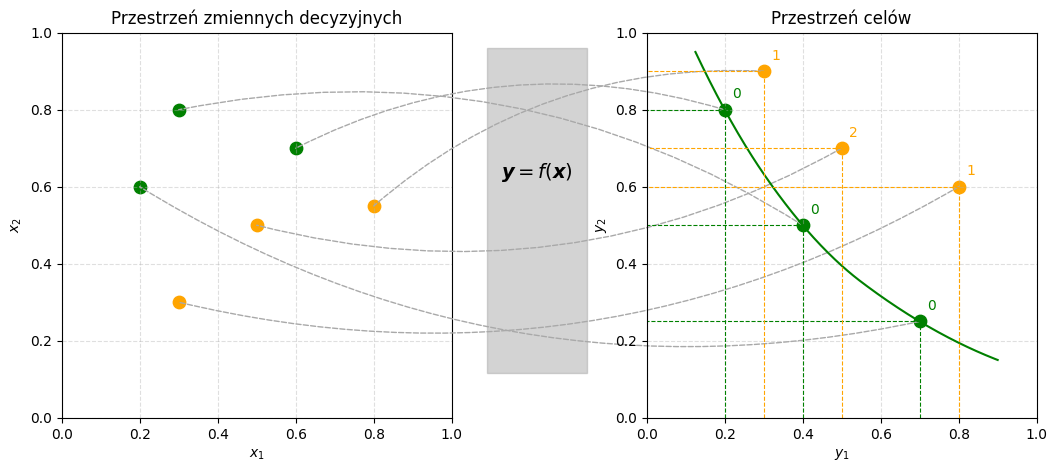

In [2]:
import plots
plots.draw_pareto_front()

Rys .1. Wizualizacja ogólnej koncepcji procesu optymalizacji wielokryterialnej (liczby przy rozwiązaniach w przestrzeni celów oznaczają liczbę rozwiązań, które nad danym rozwiązaniem dominują (na podstawie [ZLT2002])

W zdecydowanej większości praktycznych problemów optymalizacji wielokryterialnej zbiór $\boldsymbol{F}_{OPT}$ jest nieznany lub niemożliwy do ustalenia (np. z powodu nieskończonej liczby rozwiązań Pareto-optymalnych), dlatego zadaniem metod optymalizacji wielokryterialnej jest aproksymacja zbioru Pareto-optymalnego za pomocą zbioru $\boldsymbol{A}$ zawierającego pewną, zadaną ilość rozwiązań niezdominowanych. Z powodu trudności z uzyskaniem $\boldsymbol{F}_{OPT}$, wprowadzono dodatkowo pojęcie zbioru odniesienia $\boldsymbol{F}_{REF}$, który zawiera skończoną liczbę rozwiązań Pareto-optymalnych (bądź rozwiązań znajdujących się tak blisko rozwiązań Pareto-optymalnych, jak to tylko możliwe) uzyskanych w sposób sztuczny, tzn. przy pomocy jakiejś zewnętrznej metody optymalizacji lub analizy matematycznej danego problemu. Zatem, jakość uzyskanego zbioru $\boldsymbol{A}$ może być określana poprzez porównanie go ze zbiorem $\boldsymbol{F}_{REF}$ [Rudzinski2015].

Przykładowy przebieg procesu ewolucyjnej optymalizacji wielokryterialnej prezentuje Rys. 3. (obliczenia wykonano z wykorzystaniem pakietu jMetalPy 1.7.0 [BNGOD2019]).

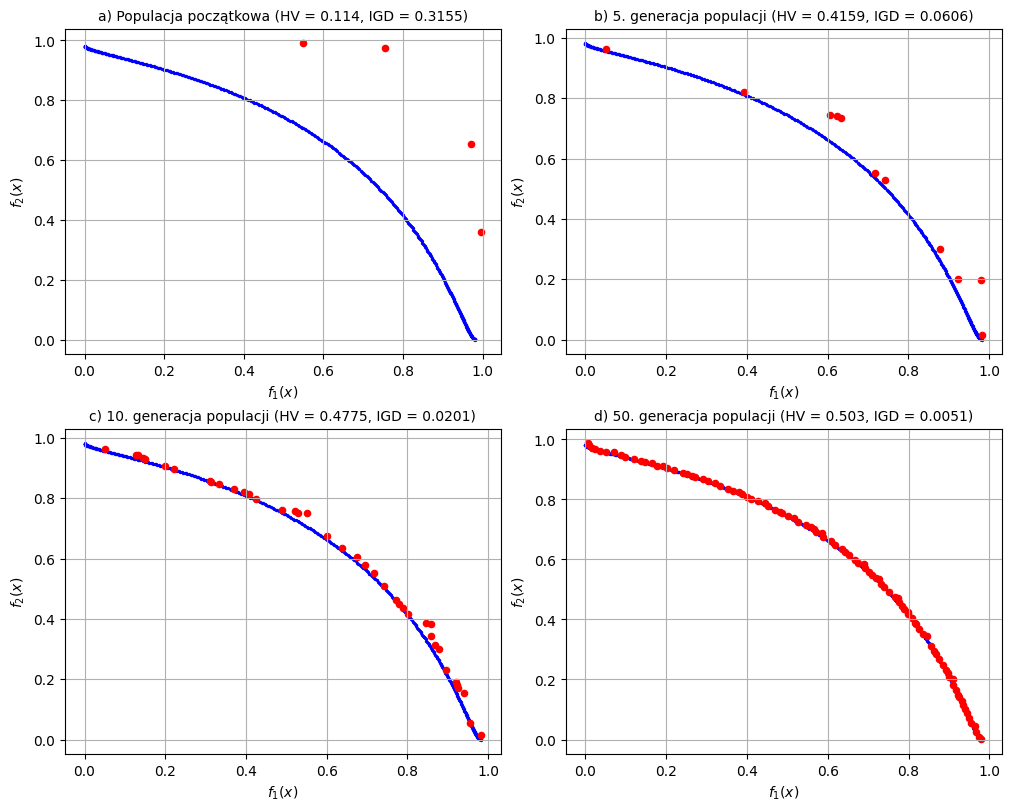

In [1]:
import plots
plots.draw_selected_generations()

Rys. 3: Prezentacja przebiegu procesu optymalizacji wielokryterialnej z wykorzystaniem algorytmu NSGA-II podczas rozwiązywania problemu testowego Fonseca.

# PRZEGLĄD ALGORYTMÓW
Pierwszym historycznie algorytmem ewolucyjnej optymalizacji wielokryterialnej był zaproponowany w połowie lat 80-tych przez Shaffera algorytm VEGA (<i>ang. Vector Evaluation Genetic Algorithm</i>) [Schaffer1984]. 
Od tamtej pory powstało wiele podejść wykorzystujących algorytmy ewolucyjne w celu rozwiązania problemów optymalizacji wielokryterialnej, które ze względu na mechanizm wykorzystywany do obliczenia funkcji przystosowania, ogólnie można podzielić na następujące typy [LDZK2015,YXWY2016]:
- metody bazujące na relacji dominacji (<i>ang. dominance-based</i>) – wyjaśnione szeroko w dalszej części rozdziału, 
- metody bazujące na wskaźnikach jakości (<i>ang. indicator-based</i>) wykorzystujące wybrany wskaźnik jakość (np. hiperobjętość) w celu obliczenia funkcji przystosowania rozwiązań oraz 
- metody bazujące na dekompozycji (<i>ang. decomposition-based</i>) polegające na podziale danego problemu na mniejsze i optymalizowaniu oddzielnie każdego podproblemu w sposób sekwencyjny lub równoległy. 

Historycznie, wymienia się także metody bazujące na agregacji optymalizowanych funkcji celu (<i>ang. aggregation-based</i>), do których można zaliczyć algorytmy z prac [HL1992, IM1996] oraz metody bazujące na kryteriach (<i>ang. criterion-based</i>), które to w czasie procedury selekcji „przełączają się” pomiędzy zadanymi funkcjami celu, a wybrana funkcja celu decyduje, które osobniki zostaną wybrane do reprodukcji [ZLB2004]. Do ostatniego typu metod można zaliczyć wspomniany algorytm VEGA oraz np. algorytm z pracy [Kursawe1991].

Najpopularniejszymi metodami, stanowiącymi bardzo często punkt odniesienia dla nowych, są metody oparte na relacji dominacji. Do tych metod zalicza się algorytm NSGA-II (<i>ang. Non-dominated Sorting Genetic Algorithm II</i>) [DPAM2002], będący uogólnieniem algorytmu NSGA [SD1995] i algorytm SPEA2 (<i>ang. Strength Pareto Evolutionary Algorithm</i>) [ZLT2002], będący analogicznie uogólnieniem algorytmu SPEA [ZT1999], a także ich kolejne generacje i modyfikacje, m.in. $\varepsilon$-NSGA-II [DMM2003], NSGA-III [DJ2014] oraz SPEA3 [Rudzinski2015].

Podstawowym problemem algorytmu VEGA jest jego zbieżność do rozwiązań, które są najlepsze pod względem jednego z kryteriów, a słabe pod względem pozostałych. Zatem odrzucane są rozwiązania charakteryzujące się dobrym kompromisem ze względu na wszystkie zadane kryteria. Wprowadzenie relacji dominacji do mechanizmu obliczania funkcji przystosowania danego rozwiązania rozwiązuje ten problem, a wsparcie go dodatkowo strategią "niszowania" pozwala na zachowanie różnorodności uzyskiwanych rozwiązań. W oparciu o powyższe wskazówki zaproponowane przez Goldberga [Goldberg1995], powstała I generacja algorytmów ewolucyjnej optymalizacji wielokryterialnej. Do tych algorytmów możemy zaliczyć właśnie algorytm NSGA. Wadą  algorytmów I generacji jest brak selekcji elitarnej (zapewniającej najlepszym rozwiązaniom przejście do populacji potomnej podczas kolejnej iteracji algorytmu). Algorytmy II generacji (NSGA-II, SPEA, SPEA2) uwzględniają elitarność w różny sposób. NSGA-II wykorzystuje w tym celu selekcję typu $(\mu + \lambda)$, natomiast algorytm SPEA dodatkowy zbiór, tzw. archiwum rozwiązań niezdominowanych, co więcej w SPEA, w celu utrzymania różnorodności populacji wprowadzono technikę klasteryzacji ALM (<i>ang. Average Linkage Method</i>). Poza tym, NSGA-II eliminuje wady poprzednika, do których należą: wysoka złożoność obliczeniowa i wymóg określenia dodatkowego parametru związanego z mechanizmem "niszowania" oraz wprowadza tzw. operator stłoczenia (<i>ang. crowded comparison operator</i>) - mechanizm usprawniający zachowanie różnorodności. W SPEA2, także należącym do tej generacji, został poprawiony sposób obliczania funkcji przystosowania, co bezpośrednio przekłada się na poprawę zbieżności algorytmu oraz został zmodyfikowany mechanizm redukcji archiwum, co z kolei pozwala na zagwarantowanie zachowania rozwiązań brzegowych aproksymowanego frontu Pareto.

Równoległą linię do II generacji algorytmów bazujących na relacji dominacji jednocześnie zachowujących "elitarność" stanowią algorytmy oparte na dekompozycji, czyli przekształceniu zadania wielokryterialnego w zestaw wielu zależnych od siebie zadań (podproblemów) jednokryterialnych. Do tego typu algorymów zalicza się algorytm MOEA/D (<i>ang. Multi-Objective Evolutionary Algorithm based on Decomposition</i>) [ZL2007]. W MOEA/D każdy z tych podproblemów odpowiada innemu połączeniu wag celów (np. w oparciu o metodę ważonej sumy lub funkcję Chebyszewa) i utrzymuje własną grupę sąsiednich podproblemów o podobnych wektorach wag, z którymi wymienia informacje o rozwiązaniach. W procesie ewolucji nowe rozwiązania generowane są poprzez krzyżowanie i mutację osobników należących do sąsiedztwa, a następnie zastępują słabsze rozwiązania w jego obrębie. Najlepsze rozwiązania uzyskane dla poszczególnych podproblemów wspólnie tworzą przybliżenie frontu Pareto. MOEA/D charakteryzuje się wysoką efektywnością skalowania przy dużej liczbie celów oraz równomiernym pokryciem frontu Pareto dzięki różnorodności podproblemów. Do jego wad zalicza się jednak mniejszą skuteczność w problemach z nieciągłym lub rozłącznym frontem Pareto oraz konieczność starannego doboru funkcji dekompozycji i parametrów sąsiedztwa.

Drugą, osobną linię rozwoju do II generacji stanowią algorytmy bazujące na wskaźnikach jakości. Pierwszym historycznie algorytmem tej grupy jest IBEA (<i>ang. Indicator-Based Evolutionary Algorithm</i>) [ZK2004]. W algorytmie IBEA proces selekcji nie opiera się na relacji dominacji (jak w przypadku NSGA-II czy SPEA2), lecz na ilościowym wskaźniku jakości rozwiązania (najczęściej wskaźnik ε lub hiperobjętość), mierzącym jego wpływ na ogólną jakość populacji. IBEA bezpośrednio maksymalizuje przyjęty wskaźnik jakości frontu Pareto, co pozwala skutecznie prowadzić optymalizację nawet przy większej liczbie celów. Algorytm zachowuje elitarność, a jego populacja jest aktualizowana iteracyjnie poprzez usuwanie rozwiązań o najmniejszej wartości funkcji dopasowania i wprowadzanie nowych osobników generowanych za pomocą klasycznych operatorów ewolucyjnych. Do głównych zalet IBEA należy dobra jakość uzyskiwanych przybliżeń frontu Pareto oraz możliwość dostosowania charakteru poszukiwań poprzez wybór wskaźnika jakości. Wadą pozostaje natomiast wysoka złożoność obliczeniowa – szczególnie w przypadku wskaźników takich jak hiperobjętość – oraz konieczność doboru parametrów, które silnie wpływają na zachowanie algorytmu.

Na koniec tego rozdziału, pomimo, że nie będą wykorzystywane w poniższym opracowaniu, to warto wspomnieć także o algorytmach najnowszej generacji. Można ogólnie podzielić je na dwa kierunki rozwoju. Pierwszy, charakteryzuje się udoskonalaniem właściwości algorytmu pod względem następujących kryteriów oceny: dokładność, rozpiętość, zrównoważone rozstawienie oraz złożoność obliczeniowa. Drugi, skupia się na poprawie skuteczności algorytmów w warunkach występowania dużej liczby kryteriów (<i>ang. many-objective optimization</i>) [PF2003]. Do algorytmów reprezentujących pierwszy z kierunków zalicza się np. $\varepsilon$-NSGA-II oraz algorytm SPEA3. $\varepsilon$-NSGA-II jest jedną z modyfikacji algorytmu NSGA-II, wprowadzającą dodatkowo archiwum oparte o pojęcie $\varepsilon$-dominacji, która pozwala użytkownikowi na określenie precyzji z jaką ma być podejmowana decyzja o określeniu danego rozwiązana niezdominowanym, co w efekcie wpływa na zwiększenie szybkości zbieżności algorytmu przy jednoczesnym zachowaniu dobrze zrównoważonego rozstawienia rozwiązań w aproksymowanym froncie Pareto. Z kolei podejście SPEA3 jest uogólnieniem algorytmu SPEA2. Uogólnienie polega na podmianie procedury wymiany środowiskowej z SPEA2 na całkowicie nowa procedurę, która ma za zadanie określić finalne niezdominowane rozwiązania o wysokiej rozpiętości oraz dobrze zrównoważonym rozstawieniu w przestrzeni celów. Podczas procesu optymalizacji ewolucyjnej, rozwiązania niezdominowane są stopniowo wcielane do zbioru wynikowego i rozstawiane tak, że odległości pomiędzy nimi, a ich najbliższymi sąsiadami w przestrzeni celów są najlepsze z możliwych (możliwie jak najbardziej do siebie podobne, aby móc dostarczyć dobrze zrównoważone poziomy kompromisu pomiędzy wartościami zadanych kryteriów). Poza tym, algorytm zachowuje główne zalety SPEA2 - generuje względnie dokładne rozwiązania i pozwala, niezależnie od wielkości populacji na określenie liczby rozwiązań. Drugi kierunek rozwoju prezentuje algorytm NSGA-III. Z racji tego, że wykorzystywany w procedurze selekcji algorytmu NSGA-II mechanizm stłoczenia nie radzi sobie najlepiej przy dużej liczby kryteriów, procedurę zmodyfikowano - wprowadzono bardziej systematyczną analizę generowanych rozwiązań wykorzystując do tego celu punkty referencyjne osadzone na znormalizowanej hiperpłaszczyźnie [DD1998].

# ANALIZA PORÓWNAWCZA
W pracy przedstawiono analizę porównawczą wybranych algorytmów MOEA zastosowanych w różnych problemach testowych pod względem dokładności, rozpiętości i rozstawienia zbioru $\boldsymbol{A}$. Do analizy porównawczej wybrano następujące funkcje testowe: Kursawe [Kursawe1991], Binh2 [BK1997], DTLZ2 oraz DTLZ7 [DTLZ2002]. Tabela 1. przedstawia szczegóły charakterystyk powyższych funkcji.

| Nazwa problemu | Liczba zmiennych (n) | Liczba kryteriów | Funkcje celu | Przestrzeń poszukiwań |
|----------------|----------------------|------------------|--------------|---------------------------------|
| Fonseca        | 3                    | 2                | \begin{equation} \begin{array} \text{Min. } &
 f_1\left(\boldsymbol{x}\right)=1-{\mathrm{exp} \left(-\sum^n_{i=1}{{\left(x_i-\frac{1}{\sqrt{n}}\right)}^2}\right)\ },
\\ \text{min. } & f_2\left(\boldsymbol{x}\right)=1-{\mathrm{exp} \left(-\sum^n_{i=1}{{\left(x_i-\frac{1}{\sqrt{n}}\right)}^2}\right)\ } \end{array} \end{equation} | \begin{equation} \begin{array} & x_i \in \left[-4,4\right], \\ i = 1, 2, ..., n  \end{array} \end{equation}
| Kursawe | 3 | 2 | \begin{equation} \begin{array}
\text{Min. } & f_1\left(\boldsymbol{x}\right)={ \sum^2_{i=1}{ {\left[-10 \mathrm{exp} \left(-0.2 \sqrt{x_i^2 + x_{i+1}^2} \right) \right]}, }\ } \\ \text{min. } & f_2\left(\boldsymbol{x}\right)={ \sum^3_{i=1}{ {\left[|x_i|^{0.8} + 5 \sin(x_i^3)   \right]} }\ } \end{array} \end{equation} | \begin{equation} \begin{array} & x_i\in \left[-5,5\right], \\ i = 1, 2, 3 \end{array} \end{equation}
| Binh2 | 2 | 2 | \begin{equation} \begin{array}
\text{Min. } & f_1\left(\boldsymbol{x}\right)={ 4x_1^2 + 4x_2^2  }, \\ \text{min. } & f_2\left(\boldsymbol{x}\right)={ (x_1-5)^2 + (x_2-5)^2 } \\[2mm] \text{z ograniczeniami } & C_1\left(\boldsymbol{x}\right)={ (x_1-5)^2 + x_2^2 \le 25 }, \\[0mm] & C_2\left(\boldsymbol{x}\right)={ (x_1-8)^2 + (x_2 + 3)^2 \ge 7.7 } \end{array} \end{equation} | \begin{equation} \begin{array} & x_1\in \left[0,5\right], \\ x_2\in \left[0,3\right] \end{array} \end{equation}
| DTLZ2 | 12 | 3 | \begin{equation}
\begin{array}
\text{Min.} & f_1(\boldsymbol{x}) = (1+g(\boldsymbol{x}_M)) \cos (x_1\pi/2) \cdots \cos (x_{M-2}\pi/2) \cos (x_{M-1}\pi/2), \\
\text{min.} & f_2(\boldsymbol{x}) = (1+g(\boldsymbol{x}_M)) \cos (x_1\pi/2) \cdots \cos (x_{M-2}\pi/2) \sin (x_{M-1}\pi/2), \\
\text{min.} & f_3(\boldsymbol{x}) = (1+g(\boldsymbol{x}_M)) \cos (x_1\pi/2) \cdots \sin (x_{M-2}\pi/2), \\
\vdots & \vdots \\
%\text{min.} & f_{M-1}(\boldsymbol{x}) = (1+g(\boldsymbol{x}_M)) \cos (x_1\pi/2) \sin (x_2\pi/2), \\
\text{min.} & f_{M}(\boldsymbol{x}) = (1+g(\boldsymbol{x}_M)) \sin (x_1\pi/2), \\[2mm]
\text{gdzie} & g(\boldsymbol{x}_M) = \sum_{x_i \in \boldsymbol{x}_M} (x_i-0.5)^2 \end{array}
\end{equation} | \begin{equation} \begin{array} & x_i\in \left[0,1\right], \\ i = 1, 2, ..., n \end{array} \end{equation}
| DTLZ7 | 22 | 3 | \begin{equation}
\begin{array}
\text{Min. } & f_1(\boldsymbol{x_1})=x_1, \\
\text{min. } & f_2(\boldsymbol{x_2})=x_2, \\
\vdots & \vdots \\
\text{min. } & f_{M-1}(\boldsymbol{x}_{M-1})=x_{M-1}, \\
\text{min. } & f_M(\boldsymbol{x}) =
(1+g(\boldsymbol{x}_M))h(f_1,f_2,\ldots,f_{M-1},g), \\
\text{gdzie} & g(\boldsymbol{x}_M) = 1 + \frac{9}{|\boldsymbol{x}_M|}\sum_{x_i\in \boldsymbol{x}_M} x_i, \\
& h(f_1,f_2,\ldots,f_{M-1},g) = M-\sum_{i=1}^{M-1} \left[ \frac{f_i}{1+g}\left(1 + \sin (3\pi f_i)\right)\right]
\end{array}
\end{equation} | \begin{equation} \begin{array} & x_i\in \left[0,1\right], \\ i = 1, 2, ..., n \end{array} \end{equation}

Tabela 1. Definicje wykorzystanych funkcji testowych

Jak wspomniano, zadaniem algorytmów optymalizacji wielokryterialnej jest znalezienie zbioru $\boldsymbol{A}$, który będzie w sposób zadowalający aproksymował front Pareto. Zasadniczo, poszukuje się zbioru $\boldsymbol{A}$ pod względem jak najlepszego spełnienia następujących kryteriów oceny [OJS2003, Rudzinski2015]:
- dokładność (<i>ang. accuracy</i>)  - zbiór $\boldsymbol{A}$ możliwie jak najlepiej przybliża zbiór $\boldsymbol{F}_{OPT}$,
- rozpiętość (<i>ang. spread</i>) - zbiór $\boldsymbol{A}$ obejmuje możliwie jak największy zakres rozwiązań niezdominowanych,
- zrównoważone rozstawienie (<i>ang. distribution</i>) rozwiązań aproksymowanego frontu Pareto - zbiór $\boldsymbol{A}$ reprezentuje jak najbardziej równomierne rozłożone poziomy kompromisu ze względu na dane funkcje celu
- złożoność obliczeniowa (<i>ang. computational complexity</i>) - algorytm poszukujący rozwiązań zbioru $\boldsymbol{A}$ uzyskuje je w możliwie jak najkrótszym czasie, przy wykorzystaniu jak najmniejszej ilości zasobów pamięciowych.

Powszechnie stosowanymi wskaźnikami jakości w celu uzyskania wspomnianych wyżej własności poszukiwanego zbioru $\boldsymbol{A}$ są m.in. odwrócona odległość pokoleniowa $\mathit{IGD}$ (<i>ang. inverted generational distance</i>) [VVL1998] i hiperobjętość $HV$ (<i>ang. hypervolume</i>) [ZT1998]. Miara $\mathit{IGD}$ – mierzy jak daleko rozwiązania ze zbioru $\boldsymbol{F}_{REF}$ są odległe od rozwiązań uzyskanych podczas danego pokolenia ewolucji:
$$
\begin{equation}
IGD\left(\boldsymbol{F},\boldsymbol{A}\right)=\frac{1}{\left|\boldsymbol{F}\right|}\sqrt[q]{\sum^{\left|\boldsymbol{F}\right|}_{i=1}{d^q_{{\boldsymbol{FA}}_i}}}\
\end{equation}
$$
gdzie $|\boldsymbol{F}|$ jest liczbą rozwiązań zbioru odniesienia $\boldsymbol{F}_{REF}$, $\boldsymbol{A}$ jest zbiorem aproksymującym, a $d_{\mathbf{F}{\mathbf{A}}_{i}}$ jest odległością pomiędzy Pareto-optymalnym rozwiązaniem $\boldsymbol{F}_i \in \boldsymbol{F}$ a jego najbliższym sąsiadem ze zbioru $\boldsymbol{A}$:
$$
\begin{equation}
d_{{\boldsymbol{FA}}_{i}}=
{
	\mathop{\mathrm{min}}_
	{ 
		\begin{array}{c} 
		{A_j \in \boldsymbol{A},} \\
		j=1,2, \dots |\boldsymbol{A}|
		\end{array}
	} 
	d\left(F_i,A_j\right)
} 
\end{equation}
$$
W ogólnym przypadku $d\left(\mathrm{\ }{\boldsymbol{x}}^{\left(1\right)}\mathrm{,\ }{\boldsymbol{x}}^{(2)}\right)$ oznacza odległość pomiędzy rozwiązaniami  ${\boldsymbol{x}}^{\left(1\right)}$ i ${\boldsymbol{x}}^{(2)}$ w przestrzeni celów. Dla $q=2$, $d_{{\boldsymbol{FA}}_{i}}$ jest metryką euklidesową:
$$
\begin{equation}
d\left(\mathrm{\ }{\boldsymbol{x}}^{\left(1\right)}\mathrm{,\ }{\boldsymbol{x}}^{(2)}\right)\mathrm{=\ }\sqrt{\sum^n_{j=1}{{\left(f_j\left({\boldsymbol{x}}^{(1)}\right)-f_j\left({\boldsymbol{x}}^{(2)}\right)\right)}^2}}. 
\end{equation}
$$
Im wskaźnik $IGD\left(\boldsymbol{F},\boldsymbol{A}\right)$ jest mniejszy, tym rozwiązania ze zbioru Pareto-optymalnego $\boldsymbol{F}$ są bliżej zbioru aproksymującego $\boldsymbol{A}$, co oznacza większą dokładność uzyskanych wyników.

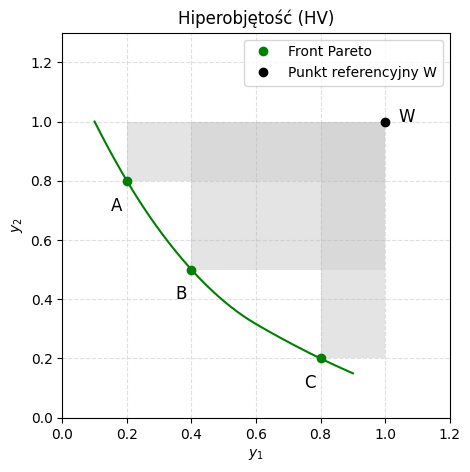

In [1]:
import plots
plots.draw_hypervolume()

Rys. 2: Wizualizacja koncepcji wskaźnika hiperobjętości

Z kolei hiperobjętość (zwana pierwotnie metryką S) mierzy w przestrzeni celów objętość
rozwiązań zdominowanych przez rozwiązania ze zbioru $\boldsymbol{A}$.
$$
\begin{equation}
HV\left(\boldsymbol{A},\boldsymbol{F}\right)= volume\left( \bigcup^{\left|\boldsymbol{A}\right|}_{i=1}{v_i}
\right)
\end{equation}
$$
Wskaźnik można zobrazować na następującym przykładzie (Rys. 2.). Przyjmując, że w procesie poszukiwania rozwiązań niezdominowanych dla problemu dwukryterialnego uzyskano zbiór $\boldsymbol{A}=\{A,B,C\}$, wskaźnik hiperobjętości $HV(\boldsymbol{A},\boldsymbol{F})$ reprezentuje pole (objętość w 2D) obszaru zdominowanego przez rozwiązania ze zbioru $\boldsymbol{A}$ i ograniczonego punktem referencyjnym $W$. Obszar ten odpowiada powierzchni zawartej wewnątrz linii przerywanej $A$–$B$–$C$–$W$–$A$, gdzie $\boldsymbol{F}=\{W\}^2$. Matematycznie rzecz ujmując, hiperobjętość jest hiperprostopadłościanem skonstruowanym z wykorzystaniem punktu referencyjnego $W$ (będącym najgorszym rozwiązaniem ze zbioru $\boldsymbol{F}$), którego przeciwległymi wierzchołkami są rozwiązania ze zbioru $\boldsymbol{A}$. Im większa jest wartość wskaźnika $HV(\boldsymbol{A},\boldsymbol{F})$ tym uzyskane rozwiązania $\boldsymbol{A}$ są bliżej rozwiązań ze zbioru $\boldsymbol{F}$ i są bardziej równomiernie rozstawione.

W celu wykonania analizy porównanawczej wybrano następujące algorytmy ewolucyjnej optymalizacji wielokryterialnej: NSGA-II, SPEA2, MOEA/D oraz IBEA. Eksperymenty wykonano z wykorzystaniem czterech funkcji testowych: Kursawe, Binh2, DTLZ2 i DTLZ7. Funkcje testowe Kursawe, Binh2 są funkcjami dwukryterialnymi, przy czym Binh2 posiada ograniczenia. Z kolei, funkcje DTLZ2 i DTLZ7 są funkcjami trójkryterialnymi pochodzącymi z pakietu DTLZ.

Wszystkie eksperymenty wykonano z wykorzystaniem algorytmów ewolucyjnych o populacji równej 100 osobników, przy czym prawdopodobieństwo krzyżowania oraz prawdopodobieństwo mutacji ustalono na równe odpowiednio 0.7 oraz 0.5. Natomiast za liczbę wszystkich generacji przyjęto 10000 dla problemów Kursawe i Binh2 oraz 100000 dla problemów DTLZ2 i DTLZ7. Tabela 2. zawiera wyniki uśrednione, uzyskane w wyniku 10-krotnego uruchomienia algorytmu dla każdego z problemów. Z kolei, Rys. 4-7., przedstawiają w formie wizualnej wybrane aproksymacje frontów Pareto.

Obliczenia wykonano z wykorzystaniem pakietu jMetalPy 1.7.0 [BNGOD2019]. Pakiet jMetalPy jest zorientowaną obiektowo biblioteką języka Python stworzona w celu rozwoju i wykonywania eksperymentów numerycznych z wykorzystaniem zaimplementowanych algorytmów ewolucyjnej (oraz rojowej) optymalizacji wielokryterialnej, zestawów różnorodnych funkcji testowych, problemów i wskaźników jakości. Pakiet jest dostępny w sieci Internet (<i>https://github.com/jMetal/jMetalPy</i>), skąd można go pobrać, a co więcej, aktywnie uczestniczyć w jego rozwoju.

In [2]:
import pandas as pd
import evaluation

df = evaluation.generate_evaluation_summary_df("results/comparative_analysis/")

df['HV (średnia)'] = df['HV (średnia)'].astype(float)
df['HV (odchylenie std.)'] = df['HV (odchylenie std.)'].astype(float)
df['IGD (średnia)'] = df['IGD (średnia)'].astype(float)
df['IGD (odchylenie std.)'] = df['IGD (odchylenie std.)'].astype(float)

def bold_min(x):
    mask_nhv = df['HV (średnia)'] == df.groupby('Nazwa problemu')['HV (średnia)'].transform('max')
    mask_igd = df['IGD (średnia)'] == df.groupby('Nazwa problemu')['IGD (średnia)'].transform('min')

    style = pd.DataFrame('', index=x.index, columns=x.columns)
    style.loc[mask_nhv, ['HV (średnia)','HV (odchylenie std.)']] = 'font-weight: bold'
    style.loc[mask_igd, ['IGD (średnia)','IGD (odchylenie std.)']] = 'font-weight: bold'
    return style

df.style.apply(bold_min, axis=None).format({
    'HV (średnia)': "{:.2e}",
    'HV (odchylenie std.)': "{:.2e}",
    'IGD (średnia)': "{:.2e}",
    'IGD (odchylenie std.)': "{:.2e}",
})

,Nazwa problemu,Algorytm,HV (średnia),HV (odchylenie std.),IGD (średnia),IGD (odchylenie std.)
0,Binh2,Epsilon-IBEA,2.17e+03,7.66e-01,2.89e-01,1.50e-02
1,Binh2,MOEAD,2.18e+03,4.43e-01,2.66e-01,5.73e-03
2,Binh2,NSGAII,2.16e+03,1.54e+00,4.55e-01,1.98e-02
3,Binh2,SPEA2,2.16e+03,1.70e+00,4.18e-01,1.84e-02
4,DTLZ2,Epsilon-IBEA,7.21e-01,7.86e-03,1.08e-01,1.12e-02
5,DTLZ2,MOEAD,6.83e-01,3.00e-03,7.40e-02,1.95e-03
6,DTLZ2,NSGAII,6.55e-01,9.41e-03,8.47e-02,4.86e-03
7,DTLZ2,SPEA2,6.63e-01,5.79e-03,7.56e-02,2.61e-03
8,DTLZ7,Epsilon-IBEA,1.22e+00,6.64e-02,1.12e-01,8.13e-02
9,DTLZ7,MOEAD,6.17e-01,3.78e-02,2.77e-01,1.68e-02


Tabela 2. Zbiorcze wyniki analizy porównawczej algorytmów rozwiązujących wybrane problemy

Rys. 4. Finalne aproksymacje zbioru Pareto-optymalnego wybranych algorytmów dla 2-kryterialnej funkcji testowej Kursawe

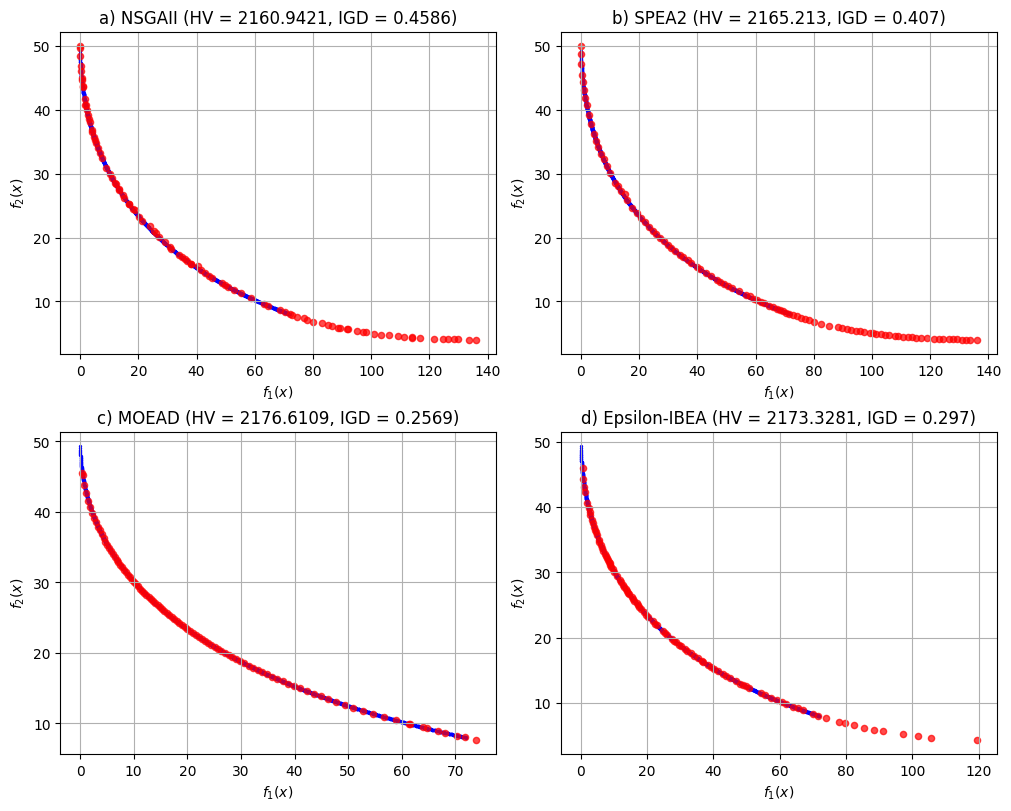

In [2]:
import plots
plots.generate_plots_2d("Binh2", 1)

Rys. 5. Finalne aproksymacje zbioru Pareto-optymalnego wybranych algorytmów dla 2-kryterialnej funkcji testowej Binh2 z ograniczeniami

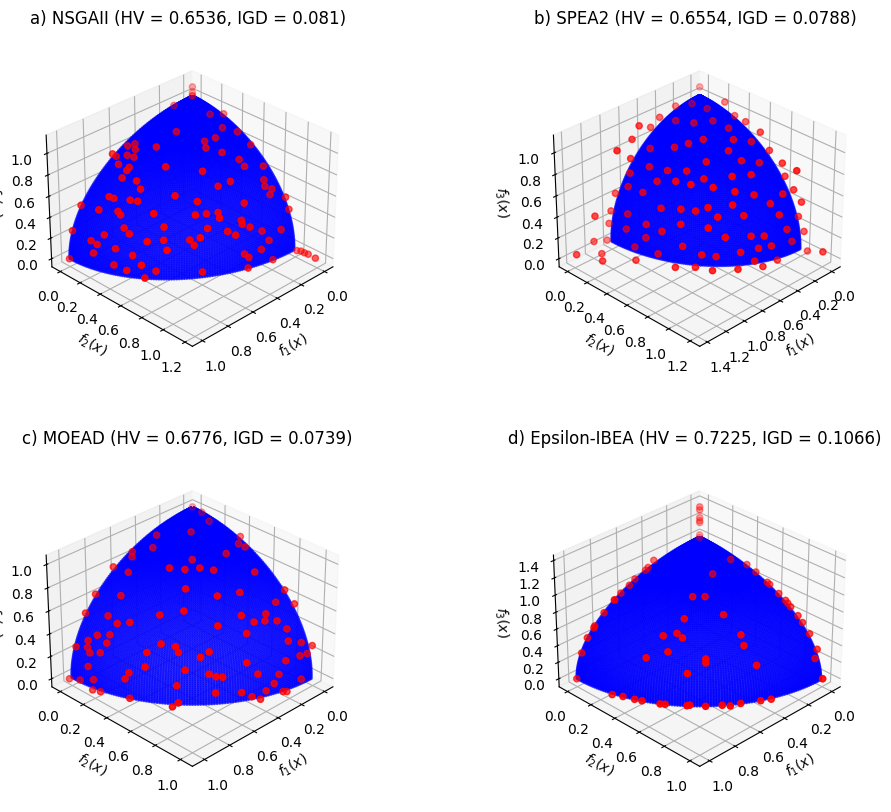

In [3]:
import plots
plots.generate_plots_3d("DTLZ2", 1)

Rys. 6. Finalne aproksymacje zbioru Pareto-optymalnego wybranych algorytmów dla 3-kryterialnej funkcji testowej DTLZ2

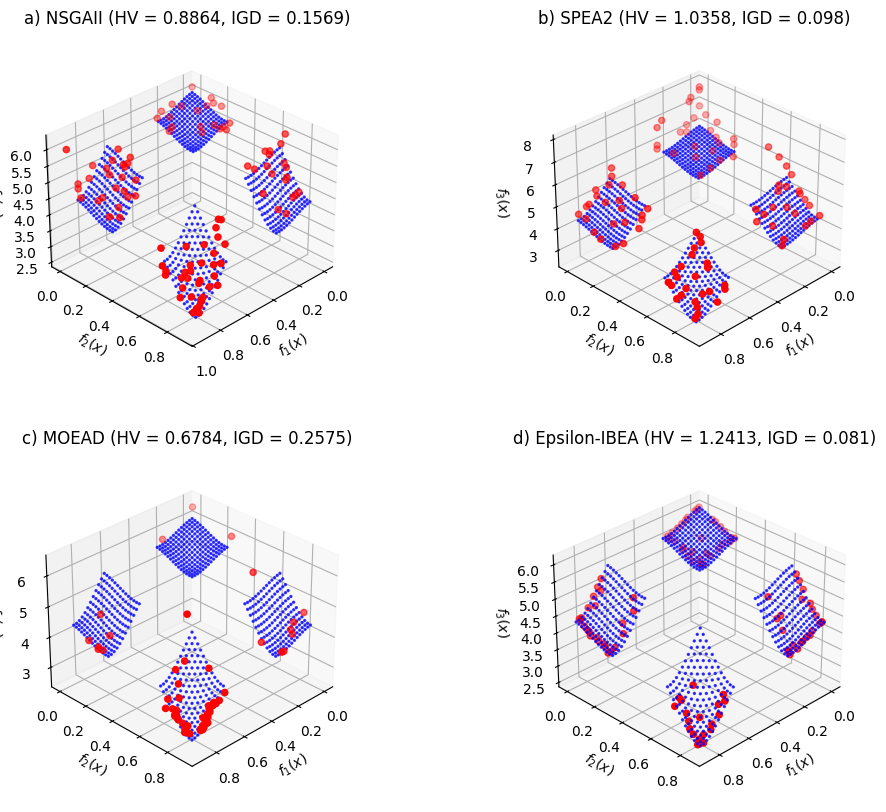

In [4]:
import plots
plots.generate_plots_3d("DTLZ7", 1)

Rys. 7. Finalne aproksymacje zbioru Pareto-optymalnego wybranych algorytmów dla 3-kryterialnej funkcji testowej DTLZ7

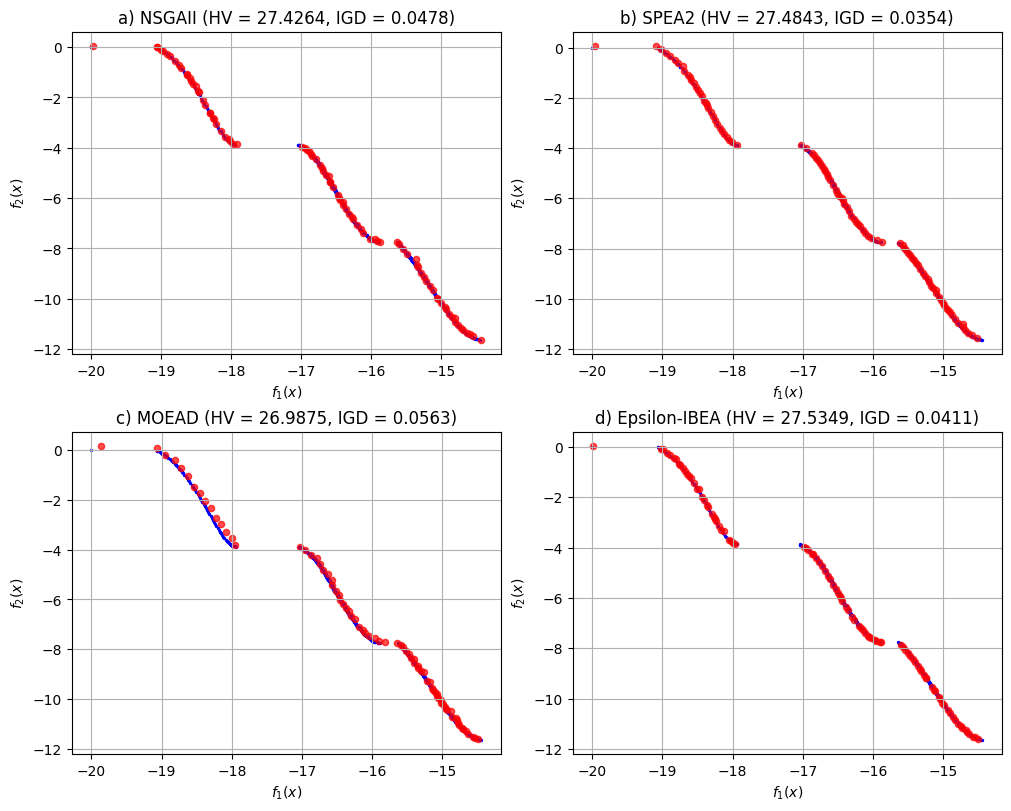

In [5]:
import plots
plots.generate_plots_2d("Kursawe", 1)

# WNIOSKI
W pracy przedstawiono analizę porównawczą wybranych algorytmów ewolucyjnej optymalizacji wielokryterialnej (NSGA-
II, SPEA2, MOEA/D oraz IBEA) zastosowanych w różnorodnych problemach testowych (Kursawe, Binh2, DTLZ2 oraz DTLZ2). Spośród rozważanych podejść i wg przyjętych miar jakości, algorytm IBEA generuje rozwiązania o najbardziej zrównoważonym kompromisie (miara HV) pomiędzy zadanymi kryteriami dla 3. z 4. rozważanych funkcji testowych. Na uwagę zasługuje także algorytm SPEA2 oraz MOEA/D. Algorytmy ten, daje najgorsze wyniki w przypadku optymalizacji funkcji testowych o dwóch kryteriach, co można zobaczyć na Rys. 3. i na Rys. 4. Rozwiązań jest zdecydowanie mniej, a ich rozstawienie jest nierównomierne - rozłożone są rzadziej na końcach zakresów funkcji, a gęściej w pobliżu środka. Z kolei, dla problemu trójkryterialnego DTLZ2, algorytm NSGA-III uzyskuje najlepszą dokładność. Poza tym, pod względem dokładności, najlepsze wyniki dla problemów Fonseca i ConstrEx uzyskuje algorytm SPEA2, a dla problemu Schaffer, algorytm NSGA-II.

### Bibliografia

<b>[Andersson2001]</b> Andersson J. (2001) <i>A Survey of Multiobjective Optimization in Engineering Design</i>, Technical Report LiTH-IKP-R-1097, Department of Mechanical Engineering, Link{\"o}ping University, Link{\"o}ping, Sweden.

<b>[BK1997]</b> Binh T.T., Korn U., (1997) <i>MOBES: A multiobjective evolution strategy for constrained optimization problems</i>, Proceedings of the Third International Conference on Genetic Algorithms (MENDEL97), 176–182.

<b>[BNGOD2019]</b> Benitez-Hidalgo A., Nebro A.J., Garcia-Nieto J., Oregi I., Del Ser J. (2019) <i>jMetalPy: A Python framework for multi-objective optimization with metaheuristics</i>, Swarm and Evolutionary Computation, 51, Elsevier.

<b>[CCLVV2007]</b> Coello Coello C., Lamont G.B., Van Veldhuizen D.A. (2007) <i>Evolutionary algorithms for solving multi-objective problems</i>, Springer.

<b>[DD1998]</b> Das I., Dennis J. (1998), <i>Normal-boundary intersection: A new method for generating the Pareto surface in nonlinear multicriteria optimization problems</i>, SIAM Journal of Optimization, \textbf{8}, 3, 631–657.

<b>[Deb2001]</b> Deb K. (2001) <i>Mulit-Objective Optimization using Evolutionary Algorithms</i>, John Wiley \& Sons.

<b>[DPAM2002]</b> Deb K., Pratap A., Agarwal S., Meyarivan T. (2002) <i>A Fast and Elitist Multiobjective Genetic Algorithm: NSGA-II. IEEE Transactions on Evolutionary Computation</i>, \textbf{6}, no. 2, pp. 182-197.

<b>[DMM2003]</b> Deb K., Mohan M., Mishra S. (2003), <i>A fast multi-objective evolutionary algorithm for finding well-spread Pareto-optimal solutions</i>, Tech. Rep. KanGAL 2003002, Indian Institute of Technology, Kanpur.

<b>[DJ2014]</b> Deb K., Jain H. (2014), <i>An Evolutionary Many-Objective Optimization Algorithm Using Reference-point Based Non-dominated Sorting Approach, Part I: Solving Problems with Box Constraints</i>, IEEE Transactions on Evolutionary Computation, \textbf{18}, Issue: 4, 577-601.

<b>[DTLZ2002]</b> Deb K., Thiele L., Laumanns M., Zitzler E. (2002), <i>Scalable multi-objective optimization test problems</i>,  Proceedings of the 2002 Congress on Evolutionary Computation. CEC'02, Honolulu, USA, 825-830

<b>[Goldberg1995]</b> Goldberg D.E. (1995) <i>Algorytmy genetyczne i ich zastosowania</i>, WNT, Warszawa.

<b>[GR2014]</b> Gorzałczany M.B., Rudziński F. (2014), <i>Fuzzy modelling of road traffic collision patterns using multi-objective genetic optimization method</i>, Logistyka, \textbf{6}, 4102-4111.

<b>[GR2016]</b> Gorzałczany M.B., Rudziński F. (2016), <i>A multi-objective genetic optimization for fast, fuzzy rule-based credit classification with balanced accuracy and interpretability</i>,  Applied Soft Computing, \textbf{40}, 206-220.

<b>[KR2006]</b> Kollat J.B., Reed P.M. (2006), <i>Comparing state-of-the-art evolutionary multi-objective algorithms for long-term groundwater monitoring design</i>, Advances in Water Resources, \textbf{29}, 6, 792-807.

<b>[HL1992]</b> Hajela P., Lin C.-Y. (1992), <i>Genetic search strategies in multicriterion optimal design</i>, Structural Optimization, \textbf{4}, 99–107.

<b>[IKK2001]</b> Ikeda K., Kita H., Kobayashi S. (2001), <i>Failure of Pareto-based MOEAs: Does non-dominated really mean near to optimal?</i>, Proc. IEEE Congr. Evol. Comput., \textbf{2}, 957–962, Seul, Korea.

<b>[IM1996]</b> Ishibuchi H., Murata T. (1996), <i>Multi-objective genetic local search algorithm</i>, Proceedings of IEEE International Conference on Evolutionary Computation (ICEC’96), 119–124, Piscataway, NJ, IEEE Press.

<b>[KYD2003]</b> Khare V., Yao X., Deb K. (2003), <i>Performance scaling of multi-objective evolutionary algorithms</i>, Proc. Evol. Multi-Criter. Optim., 376–390, Faro, Portugalia.

<b>[Kursawe1991]</b> Kursawe F. (1991), <i>A variant of evolution strategies for vector optimization</i>, Parallel Problem Solving from Nature, 193–197, Springer, Berlin.

<b>[LDZK2015]</b> Li K., Deb K., Zhang Q., Kwong S. (2015), <i>An Evolutionary Many-Objective Optimization Algorithm Based on Dominance and Decomposition</i>, \textbf{19}, Issue: 5, 694-716.

<b>[Michalewicz2003]</b> Michalewicz Z. (2003), <i>Algorytmy genetyczne + struktury danych = program ewolucyjne</i>, WNT, Warszawa.

<b>[MF2006]</b> Michalewicz Z., Fogel D.B. (2006), <i>Jak to rozwiązać, czyli nowoczesna heurystyka</i>, WNT, Warszawa.

<b>[MRW2008]</b> Miettinen K., Ruiz F., Wierzbicki A.P. (2008), <i>Introduction to Multiobjective Optimization: Interactive Approaches</i>, Lecture Notes in Computer Science, \textbf{5252}, 27-57, Springer-Verlag, Berlin Heidelberg.

<b>[OJS2003]</b> Okabe T., Jin Y., Sendhoff B. (2003), <i>A critical survey of performance indices for multiobjective optimization</i>, In Proceeding of the IEEE Congress on Evolutionary Computation, 979-885, IEEE Press.

<b>[Osowski2013]</b> Osowski S. (2013), <i>Metody i narzędzia eksploracji danych</i>, BTC, Warszawa

<b>[Osyczka2002]</b> Osyczka A. (2002), <i>Evolutionary Algorithms for Single and Multicriteria Design Optimization</i>, Physica-Verlag.

<b>[PF2003]</b> Purshouse R. C., Fleming P. J. (2003), <i>Evolutionary many-objective optimisation: An exploratory analysis</i>, Proc. IEEE Congr. Evol. Comput., \textbf{3}, 2066–2073, Canberra, Australia.

<b>[Rudzinski2015]</b> Rudziński F. (2015), <i>Finding Sets of Non-Dominated Solutions with High Spread and Well-Balanced Distribution using Generalized Strength Pareto Evolutionary Algorithm</i>, Advances in Intelligent Systems Research, \textbf{89}, 178-185.

<b>[Rudzinski2016]</b> Rudziński F. (2016), <i>A multi-objective genetic optimization of interpretability-oriented fuzzy rule-based</i>, Applied Soft Computing, \textbf{38}, 118-133, Elsevier.

<b>[Rutkowski2011]</b> Rutkowski L. (2011), <i>Metody i techniki sztucznej inteligencji</i>, PWN, Warszawa.

<b>[Schaffer1984]</b> Schaffer D. J. (1984), <i>Multiple Objective Optimization with Vector Evaluated Genetic Algorithms</i>, Ph.D. thesis, Vanderbilt University

<b>[SD1995]</b> Srinivas N., Deb K. (1995), <i>Multiobjective function optimization using nondominated sorting genetic algorithms</i>, Evol. Comput., textbf{2}, no. 3, 221–248.

<b>[VVL1998]</b> Van Veldhuizen D.A., Lamont G.B. (1998), <i>Multiobjective evolutionary algorithm research: A history and analysis</i>, Tech. Rep TR-98-03, Dept. Elec. Comput. Eng., Graduate School of Eng., Air Force Inst. Technol., Wright-Patterson, AFB, OH.

<b>[YXWY2016]</b> Yuan Y., Xu H., Wang B., Yao X. (2016), <i> A New Dominance Relation-Based Evolutionary Algorithm for Many-Objective Optimization</i>, IEEE Transactions on Evolutionary Computation, \textbf{20}, 1, 16-37. 

<b>[ZL2007]</b> Zhang, Q., & Li, H. (2007), <i>MOEA/D: A Multiobjective Evolutionary Algorithm Based on Decomposition</i>, IEEE Transactions on Evolutionary Computation, texetbf{11}, 6, 712–731.

<b>[ZJZST2006]</b>	Zhou A., Jin Y., Zhang Q., Sendhoff B., Tsang E. (2006), <i>Combining Model-based and Genetics-based Offspring Generation for Multi-objective Optimization Using a Convergence Criterion</i>, Proceeding of the IEEE Congress on Evolutionary Computation, 892-899. IEEE Press.

<b>[ZK2004]</b> Zitzler E., Künzli, S. (2004), <i>Indicator-Based Evolutionary Algorithm for Multiobjective Optimization</i>, Proceedings of the 8th International Conference on Parallel Problem Solving from Nature (PPSN VIII), 832–842, Springer

<b>[ZLB2004]</b> Zitzler E., Laumanns M., Bleuler S. (2004) <i>A Tutorial on Evolutionary Multiobjective Optimization</i>, Lecture Notes in Economics and Mathematical Systems, \textbf{535}, Part I, 3-37, Springer-Verlag, Berlin-Heidelberg.

<b>[ZLT2002]</b> Ziztler E., Laumanns M., Thiele L. (2002), <i>SPEA2: Improving the strength pareto evolutionary algorithm for multiobjective optimization</i>, Proceeding of the Evolutionary Methods for Design, Optimisation and Control, 95-100. CIMNE, Barcelona, Hiszpania.

<b>[ZT1998]</b> Zitzler E., Thiele L. (1998), <i>Multiobjective Optimization Using Evolutionary Algorithms — A Comparative Case Study</i>, Parallel Problem Solving from Nature – PPSN V, Lecture Notes in Computer Science, texetbf{1498}, 292–301, Springer

<b>[ZT1999]</b> Zitzler E., Thiele L. (1999), <i>Multiobjective evolutionary algorithms: A comparative case study and the strength pareto approach</i>, IEEE Transactions on Evolutionary Computation, texetbf{3},4, 257-271.






<center><h2><b>MULTI-OBJECTIVE EVOLUTIONARY ALGORITHMS</b></h2></center>

<h3>Abstract</h3>

The paper presents a comparative analysis of the selected evolutionary multiobjective algorithms, i.e., NSGA-II, NSGA-III, SPEA2 and SPEA3. The performance of considered approaches has been tested with the use of 4 well-known two- and three-objective optimization benchmark problems (i.e., Schaffer, Fonseca, ConstrEx and DTLZ2). Experimental studies have been preceded by brief theoretical study.